In [1]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from __future__ import division
import random
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from scipy import stats
#import graphviz
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

%matplotlib inline

# Visualisation des données 

In [2]:
df = pds.read_csv('/home/mvernier/Documents/2023-2024/info6/presentation/titanic/train.csv', sep=",") # load a pandas dataframe from csv in current directory
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Après cette magnifique visualisation du jeux de données, on décide de supprimer PasengerId et Name 

# Suppression des données 

on modifie ensuite les données pour n'avoir que des données chiffrées 

In [8]:
sex=[]
for pasenger in df['Sex'] : 
    if (pasenger=='male'):
        sex.append(0)
    else : 
        sex.append(1)
df['Sex']=sex

In [9]:
cabins=[]

for element in df['Cabin']:
    if type(element)==str:
        letter=element[:1]
        if letter=="A":
            cabins.append(1)
        elif letter=="B":
            cabins.append(2)
        elif letter=="C":
            cabins.append(3)
        elif letter=="D":
            cabins.append(4)
        elif letter=="E":
            cabins.append(5)
        elif letter=='F':
            cabins.append(6)
        elif letter=='T':
            cabins.append(7)
        else :
            cabins.append(8)
    else:
        cabins.append(float('nan'))
            
df["Cabin"]=cabins


In [10]:
donnee=df.drop(['PassengerId'], axis=1)
donnee=donnee.drop(['Name'], axis=1)

In [11]:
donnee=donnee.drop(['Ticket'], axis=1)

In [12]:
donnee.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,3.0,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,3.0,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


## On tente de discrétiser la classe age 

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

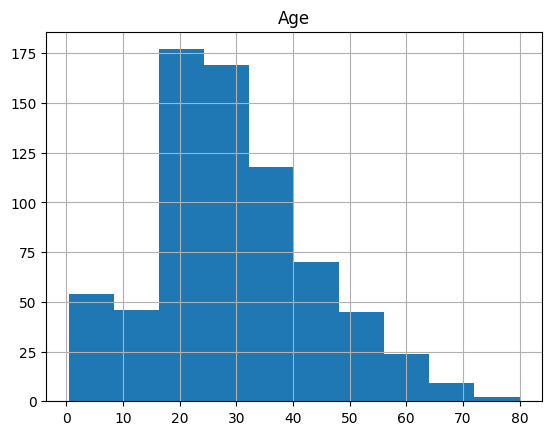

In [13]:
donnee.hist('Age')

In [14]:
donnee['Age'].isnull().sum()

177

On a 177 valeurs manquantes dans Age, on décide donc de supprimer ces passagers

In [15]:
tab=donnee.dropna()

In [16]:
tab['Age'].isnull().sum()

0

In [17]:
age=[]
for x in tab['Age'] :
    if 0<x<18 : 
        age.append(0)
    elif 18<x<25 : 
        age.append(1)
    elif 25<x<40 : 
        age.append(2)
    else :
        age.append(3)
tab['Age']=age
tab.head()

/tmp/ipykernel_10946/588412388.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['Age']=age


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,1,2,1,0,71.2833,3.0,C
3,1,1,1,2,1,0,53.1000,3.0,S
6,0,1,0,3,0,0,51.8625,5.0,S
10,1,3,1,0,1,1,16.7000,8.0,S
11,1,1,1,3,0,0,26.5500,3.0,S


In [18]:
tab=tab.drop(['Embarked'], axis=1)

# Random forest

In [19]:
survived=tab['Survived']
survie=[]
classes = tab.loc[:,"Survived"]
for x in classes : 
    if x==0 : 
        survie.append('mort')
    else : 
        survie.append('survie')
classes=survie

In [20]:
dff = tab.drop(['Survived'],axis=1) # on cherche à prédire qui survie 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dff,classes , test_size=0.33, random_state=10)

In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [23]:
model = ensemble.RandomForestClassifier(n_estimators=50, criterion = 'entropy', random_state=10,
                                        min_samples_leaf=3,bootstrap=True)

In [24]:
model.fit(X_train, y_train)
sortedLabelList = sorted(list(set(classes)))
print(sortedLabelList)
y_predict_train = model.predict(X_train)
metrics.confusion_matrix(y_true=y_train, y_pred=y_predict_train, labels=sortedLabelList)

['mort', 'survie']


array([[30, 10],
       [ 4, 78]])

In [25]:
y_predict = model.predict(X_test)
print(y_predict[0:5])
print(metrics.accuracy_score(y_test, y_predict))

['survie' 'survie' 'mort' 'survie' 'survie']
0.7704918032786885


In [32]:
print(X_test.head())
type(X_test)

     Pclass  Sex  Age  SibSp  Parch      Fare  Cabin
319       1    1    3      1      1  134.5000    5.0
558       1    1    2      1      1   79.6500    5.0
625       1    0    3      0      0   32.3208    4.0
504       1    1    0      0      0   86.5000    2.0
887       1    1    1      0      0   30.0000    2.0


pandas.core.frame.DataFrame

In [39]:
x=pds.DataFrame({ "Pclass": [2],"Sex":[0],"Age":[1,2,3],"SibSp": [0,0,0],"Parch":[0,0,0],"Fare":[150,200,300],"Cabin":[2,4,5]})
y=model.predict(x)
print(y)

['survie' 'survie' 'survie']


In [26]:
sortedLabelList = sorted(list(set(classes)))
metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList)

array([[11,  9],
       [ 5, 36]])

In [27]:
sortedLabelList

['mort', 'survie']

In [28]:
pds.DataFrame(
    metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList),
    columns=['Predicted ' + str(className) for className in sortedLabelList],
    index=['True ' + str(className) for className in sortedLabelList]
)

,Predicted mort,Predicted survie
True mort,11,9
True survie,5,36


In [29]:
print(metrics.classification_report(y_test, y_predict))  

              precision    recall  f1-score   support

        mort       0.69      0.55      0.61        20
      survie       0.80      0.88      0.84        41

    accuracy                           0.77        61
   macro avg       0.74      0.71      0.72        61
weighted avg       0.76      0.77      0.76        61



In [30]:
pds.DataFrame(model.predict_proba(X_test),
    columns=['Predicted ' + className for className in sortedLabelList]).head(10)

,Predicted mort,Predicted survie
0,0.217857,0.782143
1,0.096292,0.903708
2,0.625712,0.374288
3,0.079413,0.920587
4,0.166635,0.833365
5,0.129351,0.870649
6,0.486020,0.513980
7,0.427270,0.572730
8,0.551892,0.448108
9,0.413835,0.586165


## Cross validation 

In [31]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=10, min_samples_leaf=3)

In [32]:
scoring = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
#cv = KFold(n_splits=5, random_state=10, shuffle=True)
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_validate(model, dff, classes, scoring=scoring,
                        cv=cv, return_train_score=False)
#scores = cross_validate(model, dff, classes, scoring=scoring,
#                        cv=5, return_train_score=False)
#cv = 5 folds made by StratifiedKFold (default) for sklearn classifiers (all classifiers of class ClassifierMixin)
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_precision_weighted', 'test_recall_macro', 'test_recall_weighted', 'test_f1_macro', 'test_f1_weighted'])

In [33]:
print('Global accuracy over all folds: %0.6f (+/- %0.6f)'
      % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print('For each metric, list the score values on each fold:')
for metric in sorted(scores.keys()):
    print(str(['{:.6f}'.format(value) for value in scores[metric]]) + ' ' +metric)
    

Global accuracy over all folds: 0.727027 (+/- 0.100219)
For each metric, list the score values on each fold:
['0.058442', '0.050511', '0.053140', '0.062055', '0.047925'] fit_time
['0.010925', '0.010534', '0.009457', '0.010416', '0.009695'] score_time
['0.783784', '0.648649', '0.702703', '0.722222', '0.777778'] test_accuracy
['0.741259', '0.589940', '0.634322', '0.707792', '0.759197'] test_f1_macro
['0.778114', '0.644455', '0.689881', '0.729437', '0.781494'] test_f1_weighted
['0.757407', '0.592657', '0.652778', '0.706250', '0.753247'] test_precision_macro
['0.777578', '0.641183', '0.686937', '0.754167', '0.790043'] test_precision_weighted
['0.731667', '0.588333', '0.628333', '0.729167', '0.770833'] test_recall_macro
['0.783784', '0.648649', '0.702703', '0.722222', '0.777778'] test_recall_weighted


## KNN

<Axes: >

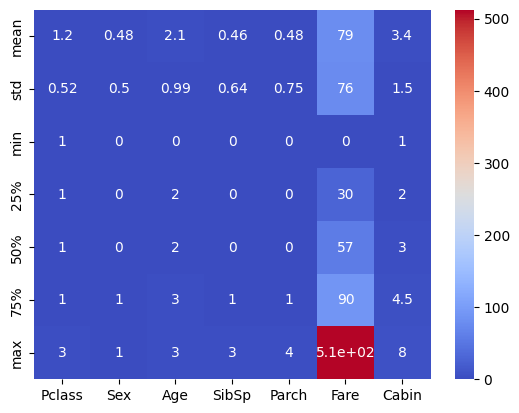

In [34]:
stats = dff.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

In [35]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(dff)
X_z = pds.DataFrame(zscore.transform(dff), index=dff.index, columns=dff.columns)
X_z.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02,1.830000e+02
mean,3.882747e-17,1.116290e-16,-1.358962e-16,-1.456030e-17,3.882747e-17,1.140557e-16,1.358962e-16
std,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00,1.002743e+00
min,-3.722562e-01,-9.624530e-01,-2.111828e+00,-7.230443e-01,-6.317298e-01,-1.033406e+00,-1.610144e+00
25%,-3.722562e-01,-9.624530e-01,-7.780420e-02,-7.230443e-01,-6.317298e-01,-6.433299e-01,-9.509578e-01
50%,-3.722562e-01,-9.624530e-01,-7.780420e-02,-7.230443e-01,-6.317298e-01,-2.847750e-01,-2.917711e-01
75%,-3.722562e-01,1.039012e+00,9.392078e-01,8.336275e-01,6.970812e-01,1.486431e-01,6.970088e-01
max,3.520480e+00,1.039012e+00,9.392078e-01,3.946971e+00,4.683514e+00,5.695465e+00,3.004162e+00


<Axes: >

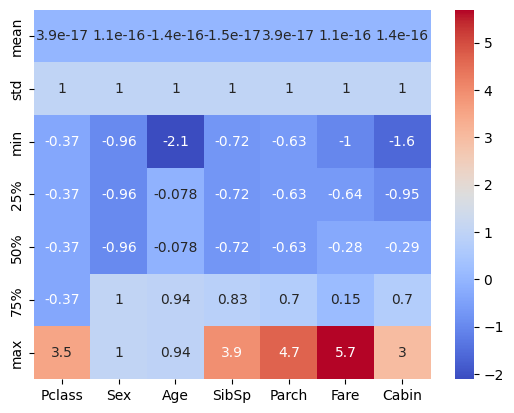

In [36]:
stats = X_z.describe()
stats = stats.drop('count',axis=0)
sns.heatmap(stats,annot=True,cmap='coolwarm')

In [37]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

knn = KNeighborsClassifier()
scores = cross_validate(knn, dff, classes, scoring=scoring,cv=cv, return_train_score=True)
scores = pds.DataFrame(scores).mean()

knn = KNeighborsClassifier()
scores_z = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_z = pds.DataFrame(scores_z).mean()

<Axes: >

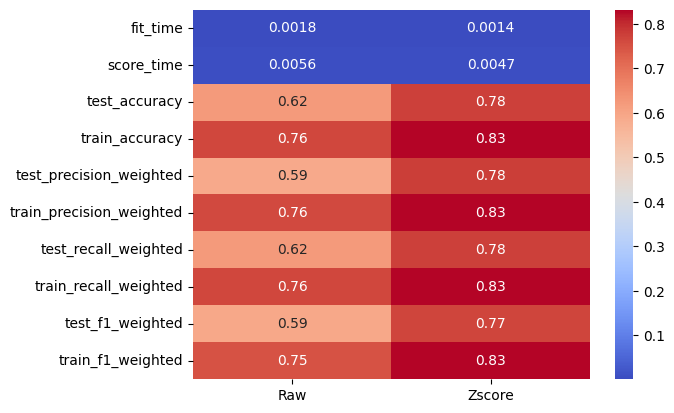

In [38]:
full_scores = pds.DataFrame({"Raw": scores, "Zscore":scores_z})
sns.heatmap(full_scores,annot=True,cmap='coolwarm')

In [39]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

n_neighbors = [1,3,5]
weights = ["uniform", "distance"]
distances = ["euclidean","manhattan"]

scoring = ['accuracy',
           'precision_weighted',
           'recall_weighted',
           'f1_weighted']

full_scores = {}
for k in n_neighbors:
    for d in distances:
        for w in weights:
            knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=d)
            scores = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
            scores = pds.DataFrame(scores).mean()
            full_scores[str(k)+"-"+d+"-"+w] = scores

<Axes: >

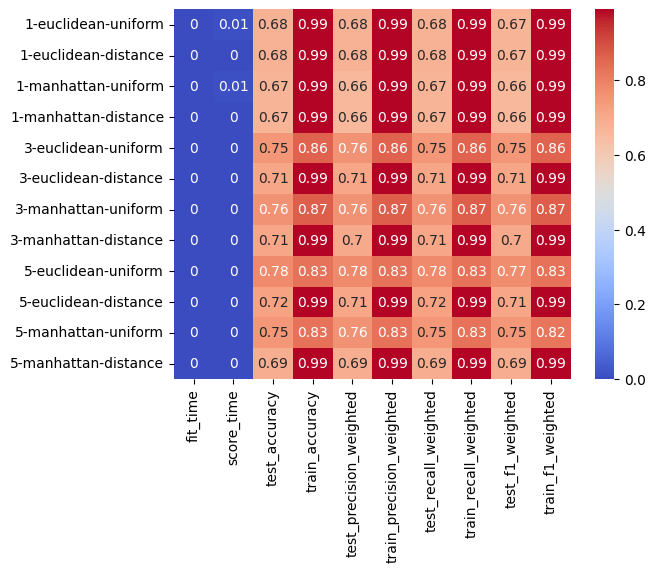

In [40]:
full_scores = pds.DataFrame(full_scores)
sns.heatmap(full_scores.T.round(2),annot=True,cmap='coolwarm')

In [41]:
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

knn = KNeighborsClassifier()
scores_knn = cross_validate(knn, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_knn = pds.DataFrame(scores_knn).mean()

dt = DecisionTreeClassifier()
scores_dt = cross_validate(dt, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_dt = pds.DataFrame(scores_dt).mean()

svm = SVC(kernel='linear')
scores_svm = cross_validate(svm, X_z, classes, scoring=scoring,cv=cv, return_train_score=True)
scores_svm = pds.DataFrame(scores_svm).mean()

<Axes: >

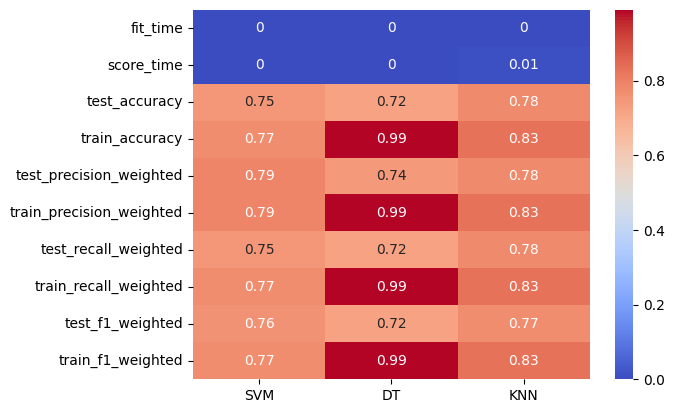

In [42]:
full_scores = pds.DataFrame({"SVM": scores_svm, "DT":scores_dt, "KNN":scores_knn})
sns.heatmap(full_scores.T.round(2).T,annot=True,cmap='coolwarm')

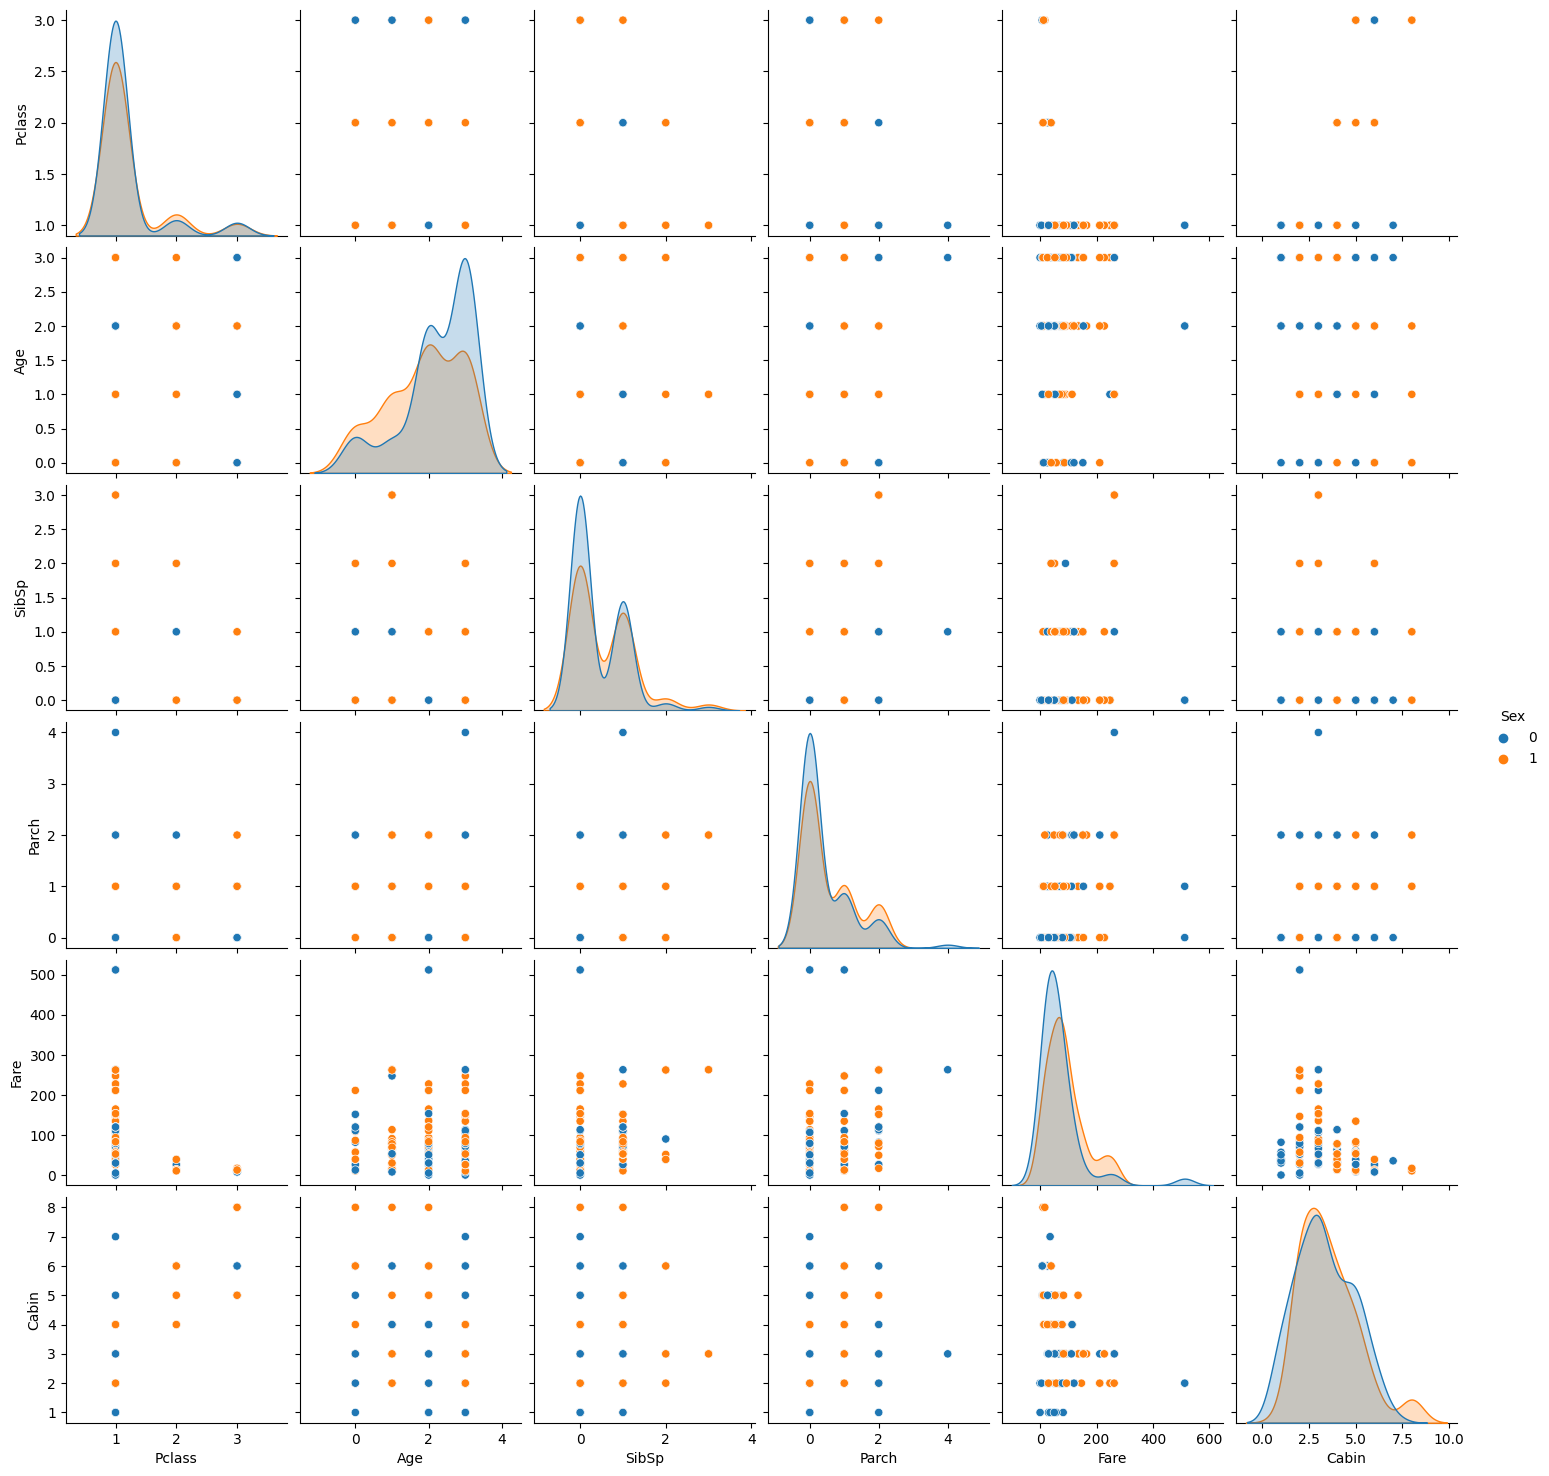

In [43]:
sns.pairplot(data=dff, hue="Sex")

<Axes: xlabel='Fare', ylabel='Sex'>

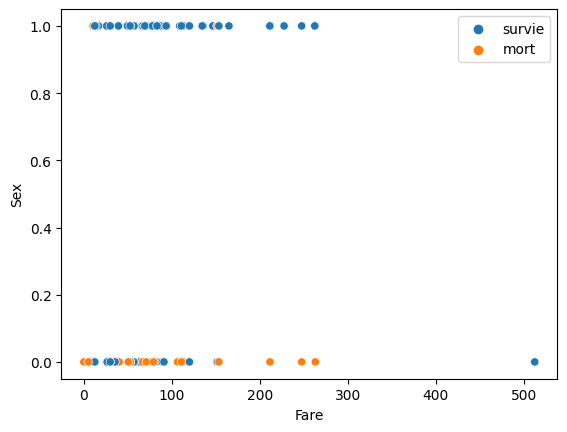

In [44]:
sns.scatterplot(data=dff, x="Fare", y="Sex", hue=classes)

# Gradient boosted tree for classification tasks

In [45]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.ensemble import GradientBoostingClassifier

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

In [47]:
def model_training(X, y, n_trees):

    ##### Step 1 - Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    ##### Step 2
    # Set model and its parameters
    model = GradientBoostingClassifier(loss='deviance', #deviance or explonential
                               criterion='squared_error', # {‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
                               learning_rate=0.1, # default 1.0
                               subsample=1.0, #default=1.0
                               random_state=0, # random state for reproducibility
                               max_features='sqrt', # number of random features to use sqrt(n_features)
                               min_samples_leaf=1000, # minimum no of observarions allowed in a leaf
                               max_depth=3, # maximum depth of the tree
                               n_estimators=n_trees # how many trees to build
                              )

    # Fit the model
    clf = model.fit(X_train, y_train)


    ##### Step 3
    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)


    ##### Step 4 - Model summary
    # Basic info about the model
    print('*************** Tree Summary ***************')
    print('No. of classes: ', clf.n_classes_)
    print('Classes: ', clf.classes_)
    print('No. of features: ', clf.n_features_in_)
    print('No. of Estimators: ', len(clf.estimators_))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    return clf, X_test, y_test
  
    
##### Step 5 - Select data and call the above function  
# Select data for modelling
X=dff[['Age', 'Sex', 'Pclass', 'Fare']]
y=classes

# Train the model and show the resuls
clf, X_test, y_test = model_training(X, y, n_trees=1000)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


*************** Tree Summary ***************
No. of classes:  2
Classes:  ['mort' 'survie']
No. of features:  4
No. of Estimators:  1000
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8108108108108109
              precision    recall  f1-score   support

        mort       0.00      0.00      0.00         7
      survie       0.81      1.00      0.90        30

    accuracy                           0.81        37
   macro avg       0.41      0.50      0.45        37
weighted avg       0.66      0.81      0.73        37

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.636986301369863
              precision    recall  f1-score   support

        mort       0.00      0.00      0.00        53
      survie       0.64      1.00      0.78        93

    accuracy                           0.64       146
   macro avg   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

# stacking => c'est un echec :(

In [48]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(dff, survived, test_size=0.2, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Train the base models
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)



GradientBoostingRegressor(random_state=42)

In [50]:
# Make predictions on the validation set
dt_pred = dt.predict(X_val)
rf_pred = rf.predict(X_val)
gb_pred = gb.predict(X_val)

In [51]:
from sklearn.linear_model import LinearRegression

# Combine the predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((dt_pred, rf_pred, gb_pred))

# Train the meta-model on the combined feature matrix and the target values
meta_model = LinearRegression()
meta_model.fit(X_val_meta, y_val)

LinearRegression()

In [54]:
# Make predictions on new data
X_new = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]])
dt_pred_new = dt.predict(X_new)
rf_pred_new = rf.predict(X_new)
gb_pred_new = gb.predict(X_new)

# Combine the predictions of the base models into a single feature matrix
X_new_meta = np.column_stack((dt_pred_new, rf_pred_new, gb_pred_new))

# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)





/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 13 features, but DecisionTreeRegressor is expecting 7 features as input.